In [3]:
# Análisis exploratorio básico del dataset

# Resumen estadístico para columnas numéricas
print("Resumen estadístico:\n")
print(df.describe())

print("\nCantidad de valores nulos por columna:\n")
print(df.isnull().sum())

print("\nDistribución de variables categóricas clave:\n")
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'loan_status', 'cb_person_default_on_file']
for col in categorical_cols:
    print(f"Frecuencia de {col}:")
    print(df[col].value_counts())
    print("-" * 40)


Resumen estadístico:

         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000         

In [4]:
#LIMPIEZA

In [7]:
# Rellenar valores nulos con la mediana correspondiente
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())



In [8]:
df.isnull().sum()


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [9]:
df.dtypes


person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [10]:
#GRÁFICOS 


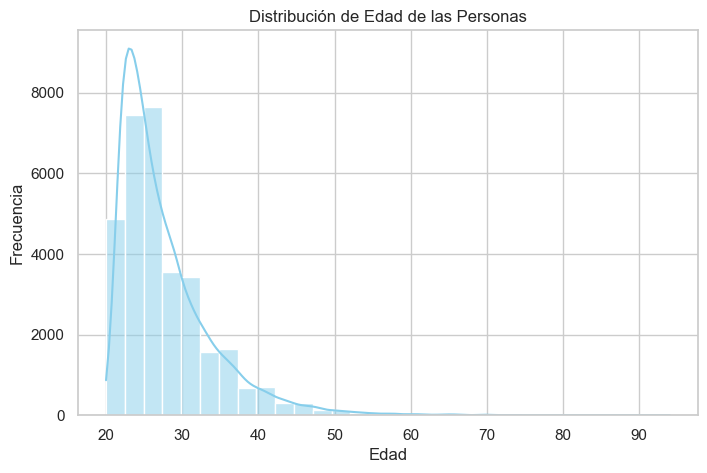

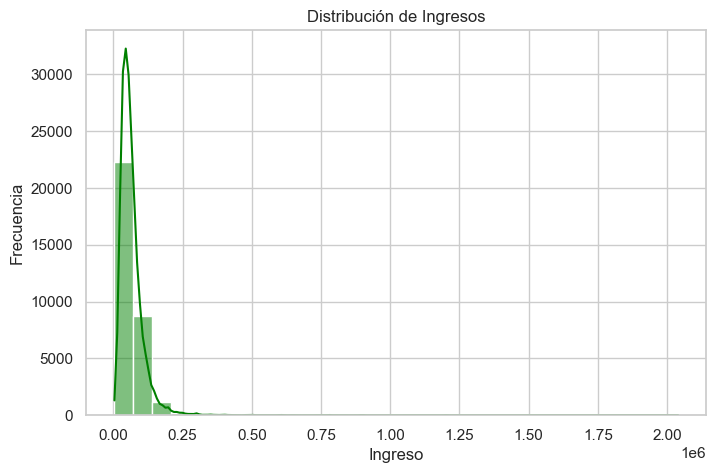

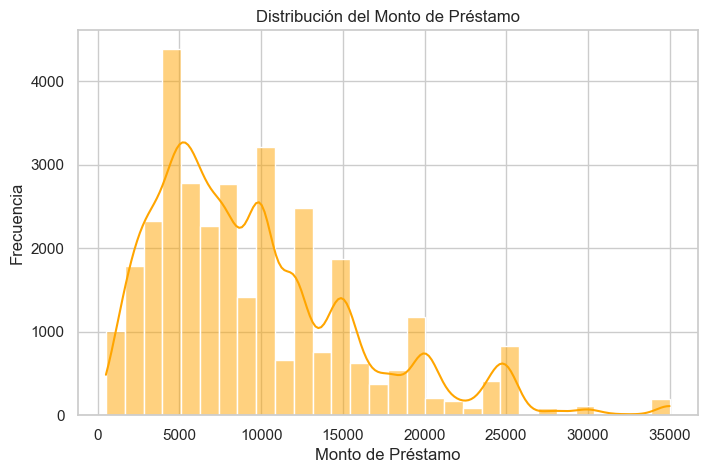

C:\Users\pablo\AppData\Local\Temp\ipykernel_2864\2759598166.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='loan_intent', data=df, order=df['loan_intent'].value_counts().index, palette='muted')


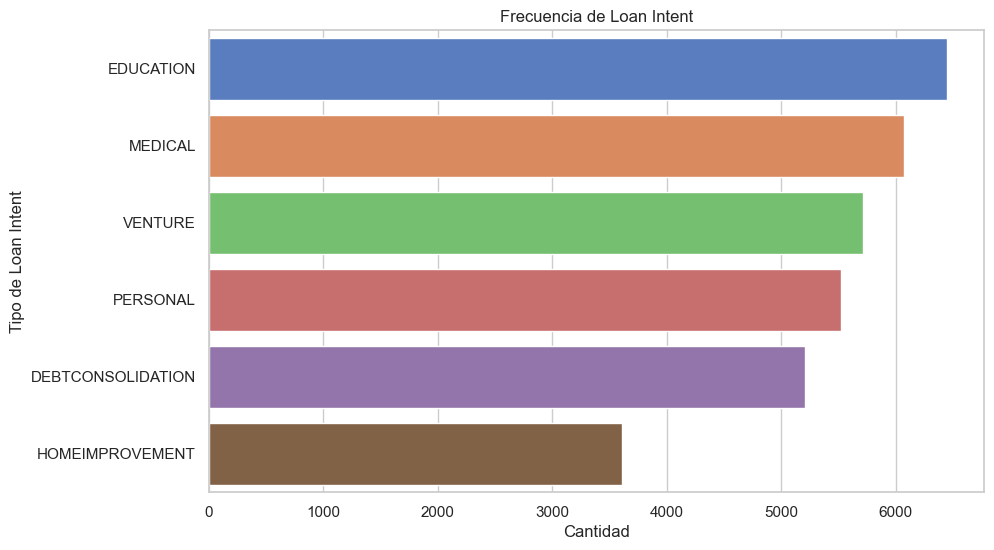

C:\Users\pablo\AppData\Local\Temp\ipykernel_2864\2759598166.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_grade', data=df, order=sorted(df['loan_grade'].unique()), palette='pastel')


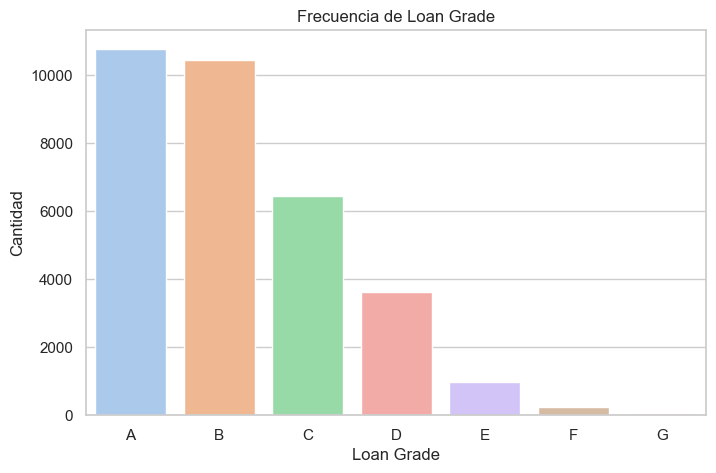

C:\Users\pablo\AppData\Local\Temp\ipykernel_2864\2759598166.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='bright')


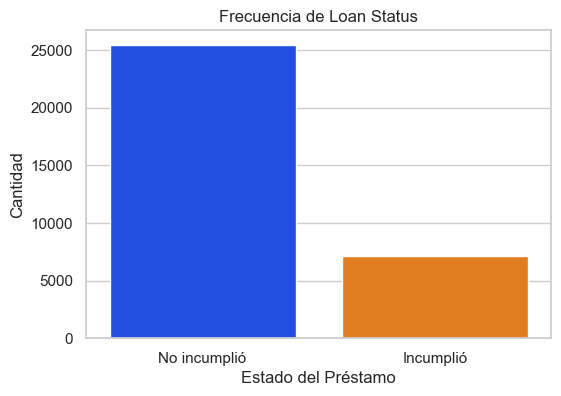

C:\Users\pablo\AppData\Local\Temp\ipykernel_2864\2759598166.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_int_rate', data=df, palette='Set2')


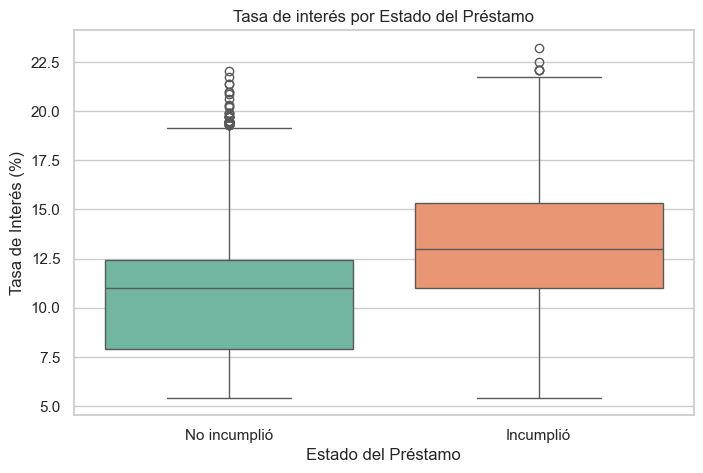

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Distribución de edades
plt.figure(figsize=(8,5))
sns.histplot(df['person_age'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Edad de las Personas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de ingresos
plt.figure(figsize=(8,5))
sns.histplot(df['person_income'], bins=30, kde=True, color='green')
plt.title('Distribución de Ingresos')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de montos de préstamo
plt.figure(figsize=(8,5))
sns.histplot(df['loan_amnt'], bins=30, kde=True, color='orange')
plt.title('Distribución del Monto de Préstamo')
plt.xlabel('Monto de Préstamo')
plt.ylabel('Frecuencia')
plt.show()

# Conteo de categorías para loan_intent
plt.figure(figsize=(10,6))
sns.countplot(y='loan_intent', data=df, order=df['loan_intent'].value_counts().index, palette='muted')
plt.title('Frecuencia de Loan Intent')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Loan Intent')
plt.show()

# Conteo de categorías para loan_grade
plt.figure(figsize=(8,5))
sns.countplot(x='loan_grade', data=df, order=sorted(df['loan_grade'].unique()), palette='pastel')
plt.title('Frecuencia de Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Cantidad')
plt.show()

# Conteo de loan_status (0: no incumplió, 1: incumplió)
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=df, palette='bright')
plt.title('Frecuencia de Loan Status')
plt.xlabel('Estado del Préstamo')
plt.ylabel('Cantidad')
plt.xticks([0,1], ['No incumplió', 'Incumplió'])
plt.show()

# Relación entre tasa de interés y estado del préstamo
plt.figure(figsize=(8,5))
sns.boxplot(x='loan_status', y='loan_int_rate', data=df, palette='Set2')
plt.title('Tasa de interés por Estado del Préstamo')
plt.xlabel('Estado del Préstamo')
plt.ylabel('Tasa de Interés (%)')
plt.xticks([0,1], ['No incumplió', 'Incumplió'])
plt.show()


In [15]:
import warnings
warnings.filterwarnings('ignore')


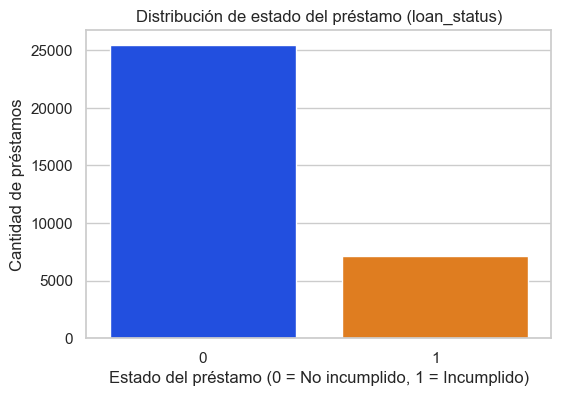

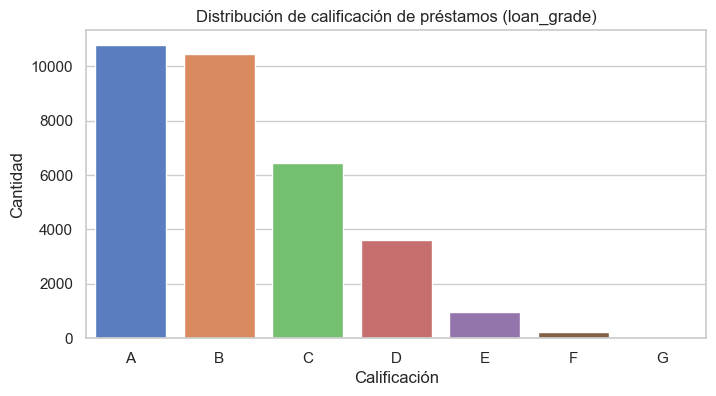

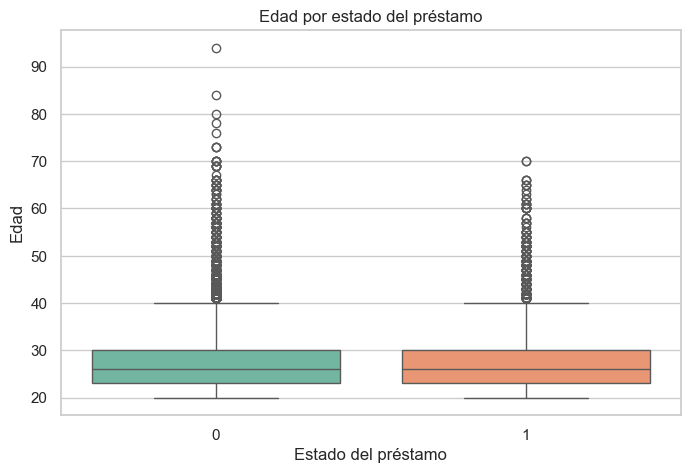

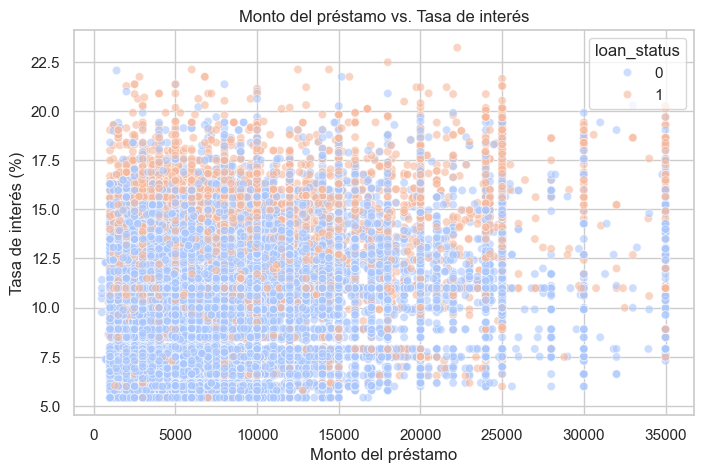

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico 1: Distribución de loan_status (estatus del préstamo)
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=df, palette='bright')
plt.title('Distribución de estado del préstamo (loan_status)')
plt.xlabel('Estado del préstamo (0 = No incumplido, 1 = Incumplido)')
plt.ylabel('Cantidad de préstamos')
plt.show()

# Gráfico 2: Distribución de loan_grade (calificación del préstamo)
plt.figure(figsize=(8,4))
sns.countplot(x='loan_grade', data=df, palette='muted', order=sorted(df['loan_grade'].unique()))
plt.title('Distribución de calificación de préstamos (loan_grade)')
plt.xlabel('Calificación')
plt.ylabel('Cantidad')
plt.show()

# Gráfico 3: Edad del solicitante (person_age) por estado del préstamo
plt.figure(figsize=(8,5))
sns.boxplot(x='loan_status', y='person_age', data=df, palette='Set2')
plt.title('Edad por estado del préstamo')
plt.xlabel('Estado del préstamo')
plt.ylabel('Edad')
plt.show()

# Gráfico 4: Relación entre monto del préstamo y tasa de interés
plt.figure(figsize=(8,5))
sns.scatterplot(x='loan_amnt', y='loan_int_rate', hue='loan_status', data=df, palette='coolwarm', alpha=0.6)
plt.title('Monto del préstamo vs. Tasa de interés')
plt.xlabel('Monto del préstamo')
plt.ylabel('Tasa de interés (%)')
plt.show()
